## EMAIL SPAM DETECTION


### Importing libraries


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

### Loading and understanding the dataset


In [13]:
df = pd.read_csv('C:\\Users\\merin\\Downloads\\archive (19)\\spam.csv', encoding='latin1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [15]:
df.rename(columns={'v1':'Category','v2':'Text'},inplace=True)
df

,Category,Text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [19]:
df.dropna(inplace=True)
df.isnull().sum()


Category      0
Text          0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [23]:
df.loc[df['Category']=='spam','Category',]=0
df.loc[df['Category']=='ham','Category',]=1
x=df['Text']
y=df['Category']
x


281                                   \Wen u miss someone
1038    Edison has rightly said, \A fool can ask more ...
2255        I just lov this line: \Hurt me with the truth
3525    \HEY BABE! FAR 2 SPUN-OUT 2 SPK AT DA MO... DE...
4668    When I was born, GOD said, \Oh No! Another IDI...
5048    Edison has rightly said, \A fool can ask more ...
Name: Text, dtype: object

In [25]:
y

281     1
1038    1
2255    1
3525    1
4668    1
5048    1
Name: Category, dtype: object

#### Train and test split


In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=3)


In [31]:
vectorizer = TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)
vectorizer.fit(X_train)
vectorizer.fit(X_test)

Y_train=Y_train.astype('int')
Y_test=Y_test.astype('int')
x_train_transformed=vectorizer.transform(X_train.values).toarray()
x_test_transformed=vectorizer.transform(X_test.values).toarray()
x_train_transformed


array([[0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 1.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       ],
       [0.2773501, 0.2773501, 0.       , 0.       , 0.       , 0.       ,
        0.2773501, 0.       , 0.2773501, 0.2773501, 0.       , 0.2773501,
        0.2773501, 0.       , 0.2773501, 0.2773501, 0.2773501, 0.       ,
        0.       , 0.2773501, 0.       , 0.       , 0.2773501, 0.2773501,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       ],
       [0.       , 0.       , 0.       , 0.       , 

In [33]:
x_test_transformed


array([[0.        , 0.        , 0.2236068 , 0.67082039, 0.2236068 ,
        0.2236068 , 0.        , 0.2236068 , 0.        , 0.        ,
        0.2236068 , 0.        , 0.        , 0.2236068 , 0.        ,
        0.        , 0.        , 0.2236068 , 0.2236068 , 0.        ,
        0.2236068 , 0.2236068 , 0.        , 0.        , 0.2236068 ],
       [0.2773501 , 0.2773501 , 0.        , 0.        , 0.        ,
        0.        , 0.2773501 , 0.        , 0.2773501 , 0.2773501 ,
        0.        , 0.2773501 , 0.2773501 , 0.        , 0.2773501 ,
        0.2773501 , 0.2773501 , 0.        , 0.        , 0.2773501 ,
        0.        , 0.        , 0.2773501 , 0.2773501 , 0.        ]])

#### Visualization

In [43]:
category=df['Category'].value_counts()

In [45]:
print(category)

Category
1    6
Name: count, dtype: int64


In [53]:
category=[6,1]

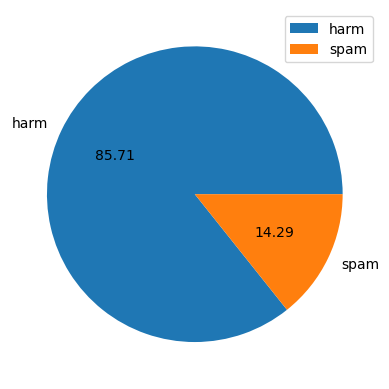

In [55]:
plt.pie(category,labels=['harm','spam'], autopct="%0.2f")
plt.legend()
plt.show()

### Email checking

In [83]:
def spamchecking(mail):
    input=feature_extraction.transform(mail)
    prediction=model.predict(input)
    if prediction==1:
        return "email is spam"
    else:
        return "email is not spam"